# Title: Swasthya AI ML Model
# Description:
Welcome to our cutting-edge health assistant!
SwasthyaAI is a powerful platform designed to help users understand and manage their health using intelligent machine learning models.
By analyzing symptoms provided by the user, the system accurately predicts possible diseases and recommends personalized precautions, medications, diets, and workouts.
Built for speed, accuracy, and accessibility — SwasthyaAI brings the power of AI to everyday health awareness.
**SwasthyaAI** is a personalized health recommendation platform powered by machine learning.  
This intelligent system is designed to assist users in early health assessment by analyzing self-reported symptoms and predicting possible diseases, followed by tailored medical guidance.

# load dataset & tools

In [1]:
import  pandas as pd

In [2]:
dataset = pd.read_csv('Training.csv')

In [3]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
# vals = dataset.values.flatten()

In [5]:
dataset.shape

(4920, 133)

# train test split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# Training top models

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

# single prediction

In [9]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [11]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [12]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [13]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System and Prediction

# load database and use logic for recommendations

In [15]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [16]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [17]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms....... chills


=================predicted disease============
Allergy
=================description==================
Allergy is an immune system reaction to a substance in the environment.
=================precautions==================
1 :  apply calamine
2 :  cover area with bandage
3 :  nan
4 :  use ice to compress itching
=================medications==================
5 :  ['Antihistamines', 'Decongestants', 'Epinephrine', 'Corticosteroids', 'Immunotherapy']
=================workout==================
6 :  Avoid allergenic foods
7 :  Consume anti-inflammatory foods
8 :  Include omega-3 fatty acids
9 :  Stay hydrated
10 :  Eat foods rich in vitamin C
11 :  Include quercetin-rich foods
12 :  Consume local honey
13 :  Limit processed foods
14 :  Include ginger in diet
15 :  Avoid artificial additives
=================diets==================
16 :  ['Elimination Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [18]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms....... blister


=================predicted disease============
Impetigo
=================description==================
Impetigo is a highly contagious skin infection causing red sores that can break open.
=================precautions==================
1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor
=================medications==================
5 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
=================workout==================
6 :  Maintain good hygiene
7 :  Stay hydrated
8 :  Consume nutrient-rich foods
9 :  Limit sugary foods and beverages
10 :  Include foods rich in vitamin C
11 :  Consult a healthcare professional
12 :  Follow medical recommendations
13 :  Avoid scratching
14 :  Take prescribed antibiotics
15 :  Practice wound care
=================diets==================
16 :  ['Impetigo Diet', 'Antibiotic treatment', 'Fruits and vegetables', 'Hydration', 'Protein-rich

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [19]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.6.1


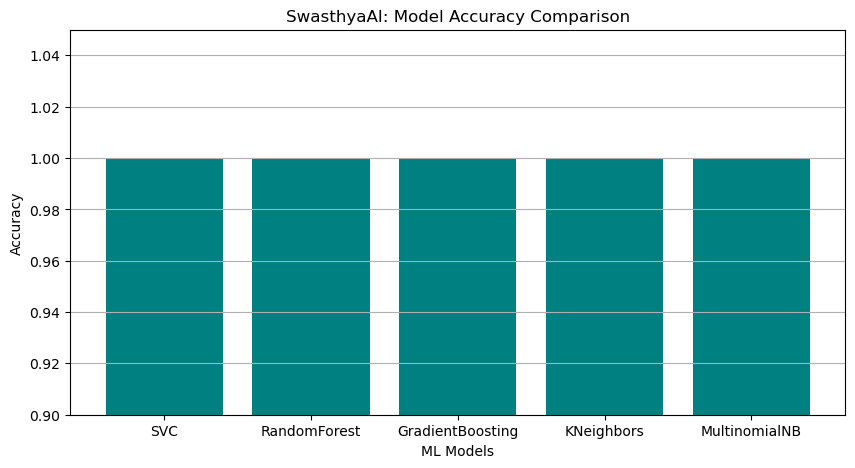

In [20]:
# SwasthyaAI - Personalized Health Diagnostic System
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load dataset
df = pd.read_csv('Training.csv')
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train multiple models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

accuracies = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, preds)

# 🎯 Plot Bar Graph - Model Accuracies
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='teal')
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.title("SwasthyaAI: Model Accuracy Comparison")
plt.ylim(0.9, 1.05)
plt.grid(axis='y')
plt.show()


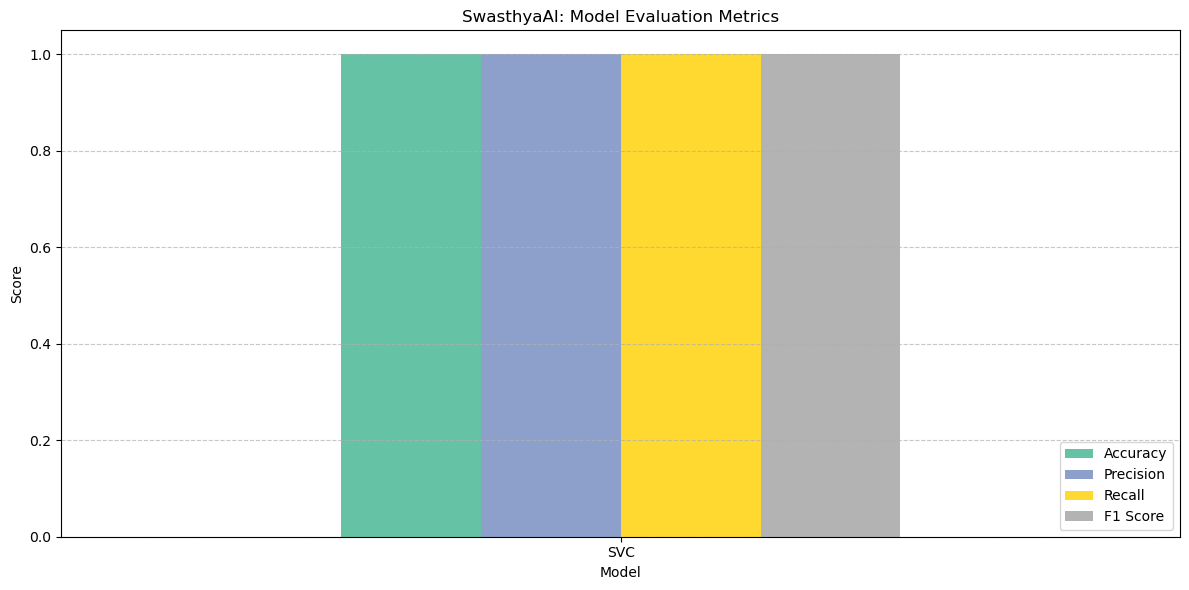

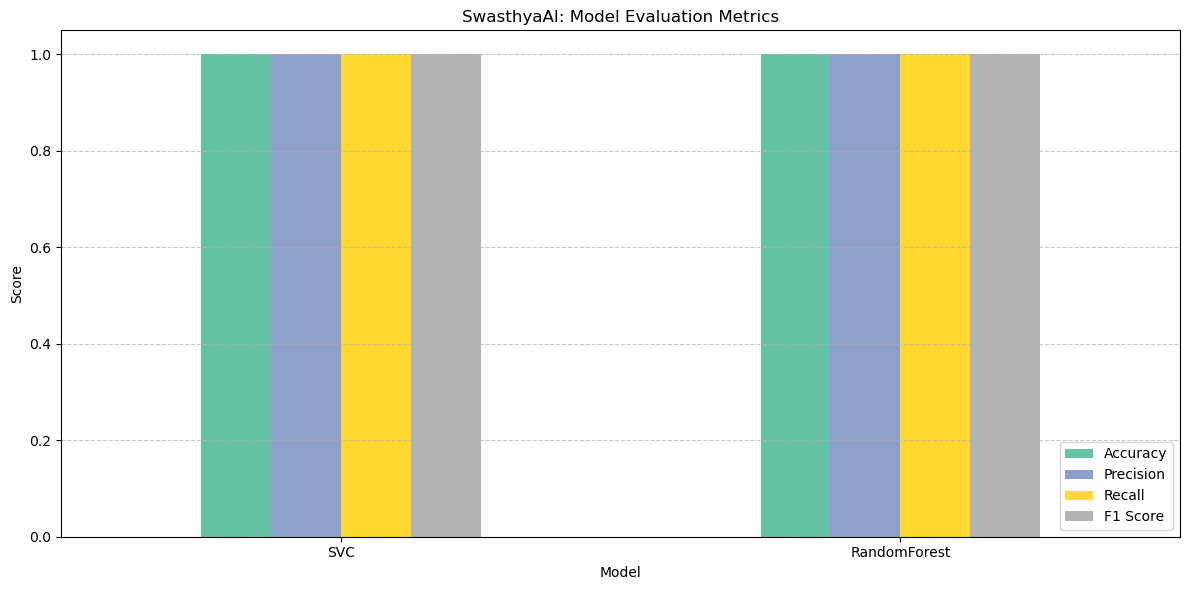

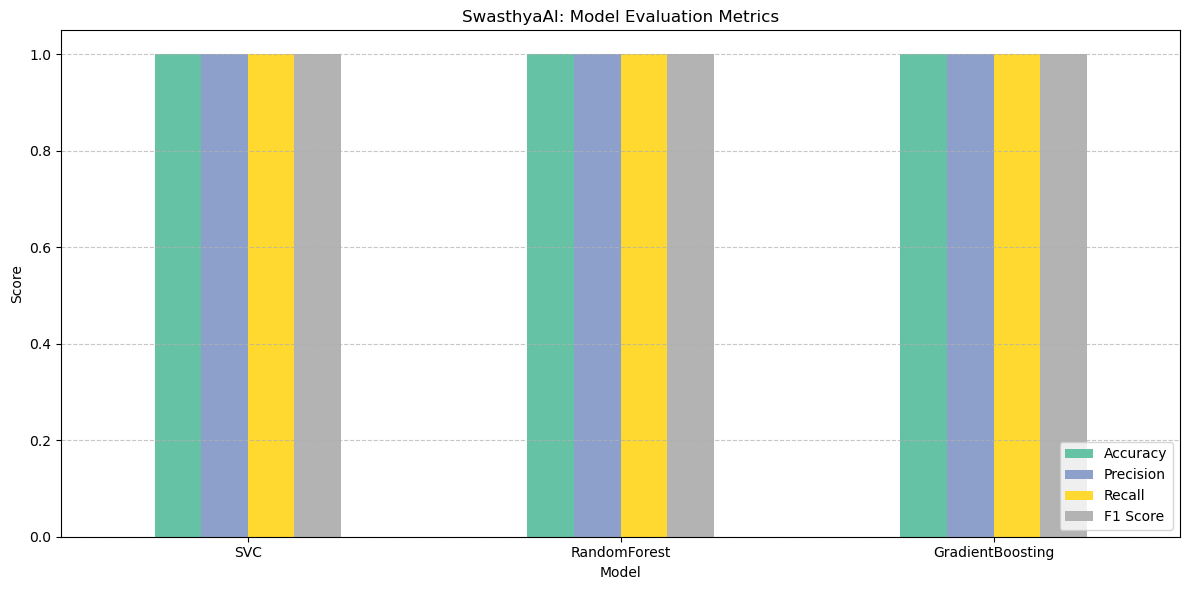

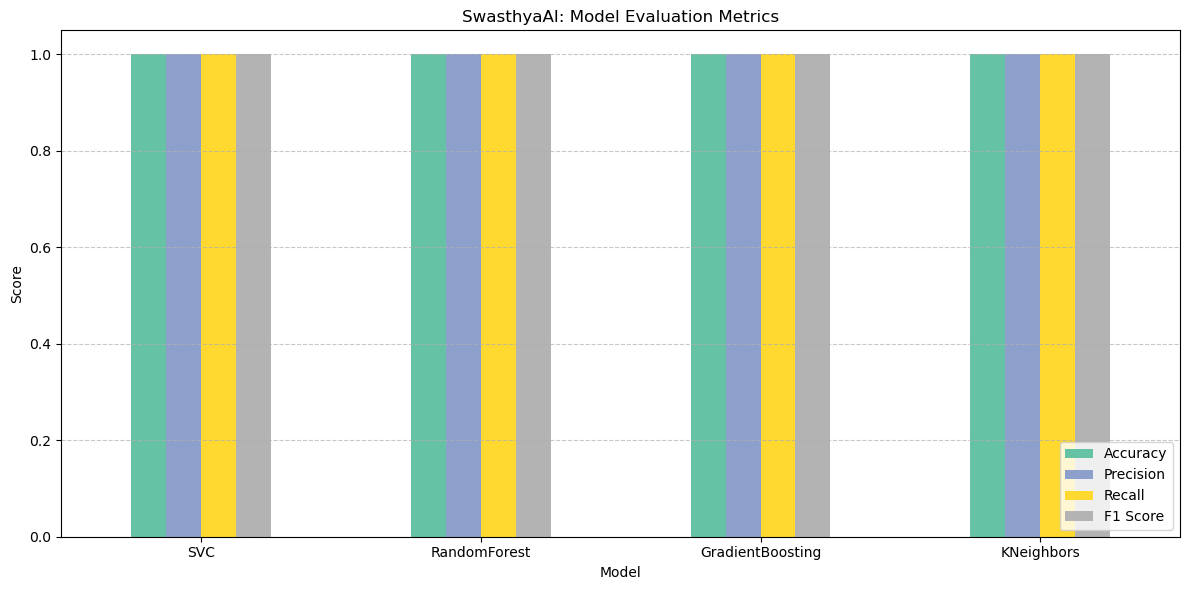

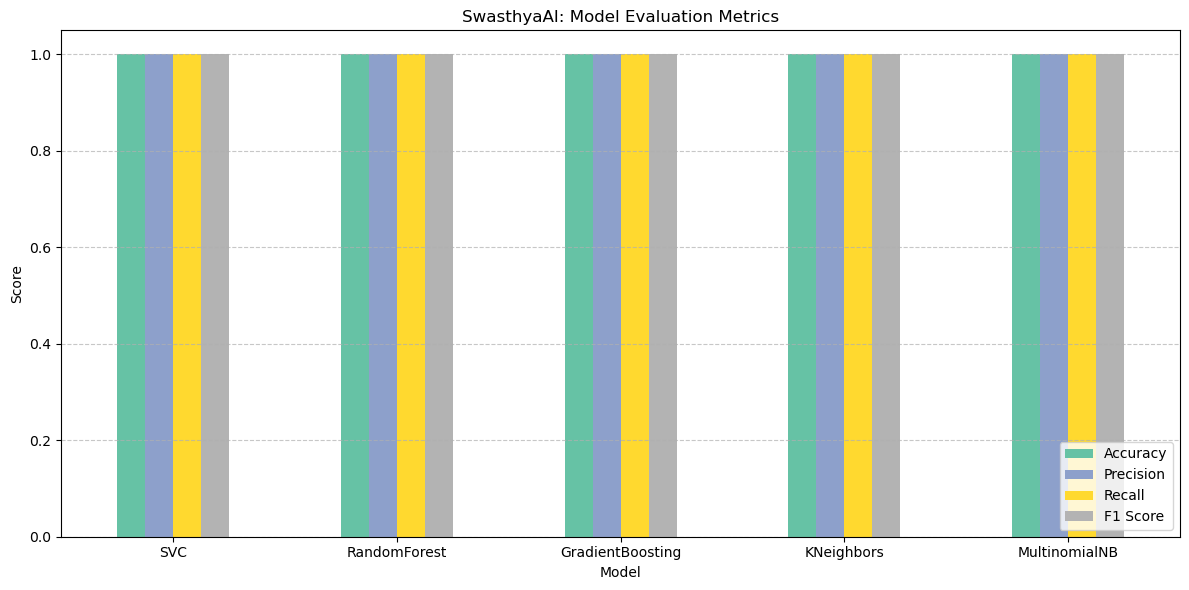

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Dictionary to hold all scores
metrics_summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    metrics_summary['Model'].append(name)
    metrics_summary['Accuracy'].append(acc)
    metrics_summary['Precision'].append(prec)
    metrics_summary['Recall'].append(rec)
    metrics_summary['F1 Score'].append(f1)
    metrics_df = pd.DataFrame(metrics_summary)
    metrics_df.set_index('Model', inplace=True)
    metrics_df.round(3)  # Show rounded scores
    metrics_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
    plt.title("SwasthyaAI: Model Evaluation Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()



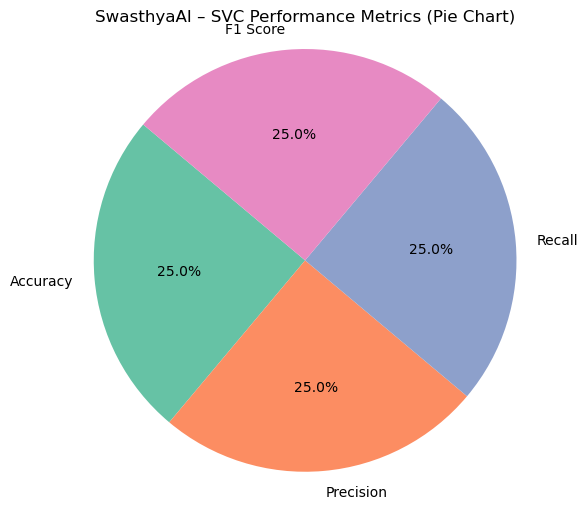

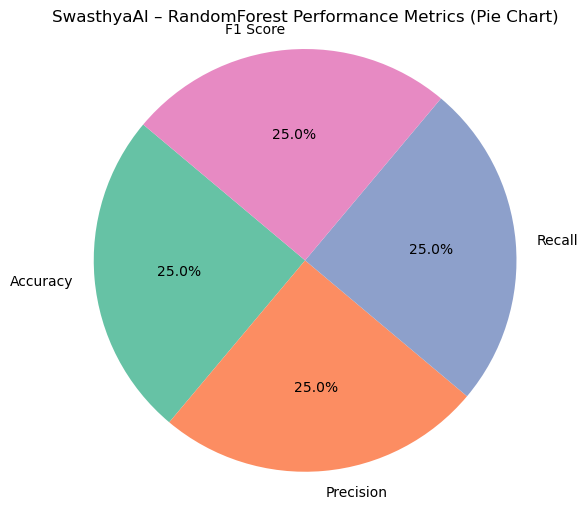

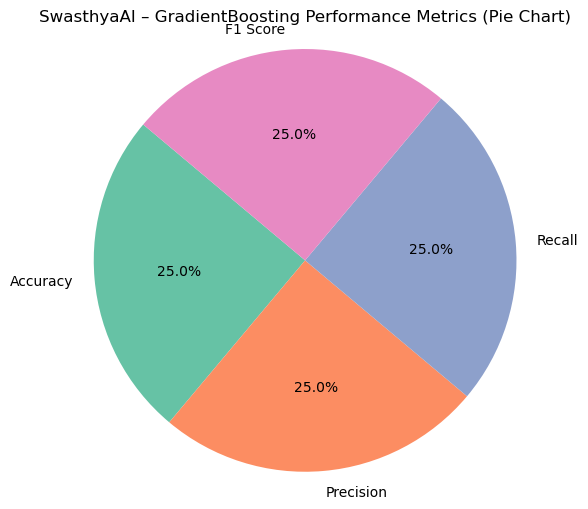

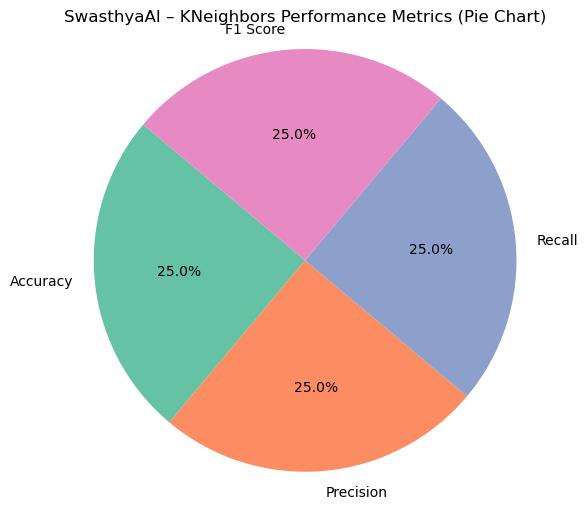

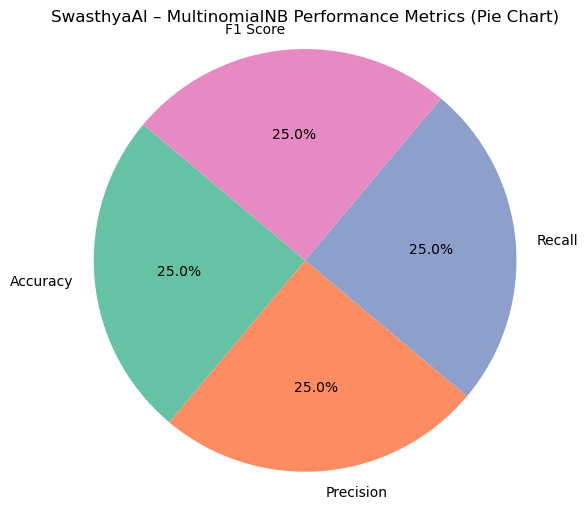

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics_summary = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics_summary[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='macro', zero_division=0)
    }
import matplotlib.pyplot as plt

# Pie chart for each model
for model_name, scores in metrics_summary.items():
    plt.figure(figsize=(6, 6))
    labels = list(scores.keys())
    values = list(scores.values())
    
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
    plt.title(f"SwasthyaAI – {model_name} Performance Metrics (Pie Chart)")
    plt.axis('equal')
    plt.show()


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store the evaluation metrics
metrics_table = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    metrics_table['Model'].append(name)
    metrics_table['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_table['Precision'].append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    metrics_table['Recall'].append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    metrics_table['F1 Score'].append(f1_score(y_test, y_pred, average='macro', zero_division=0))
import pandas as pd

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Set the 'Model' column as the index
metrics_df.set_index('Model', inplace=True)

# Round the scores for better readability
metrics_df_rounded = metrics_df.round(4)

# Display the table
display(metrics_df_rounded)


,Accuracy,Precision,Recall,F1 Score
Model,,,,
SVC,1.0,1.0,1.0,1.0
RandomForest,1.0,1.0,1.0,1.0
GradientBoosting,1.0,1.0,1.0,1.0
KNeighbors,1.0,1.0,1.0,1.0
MultinomialNB,1.0,1.0,1.0,1.0


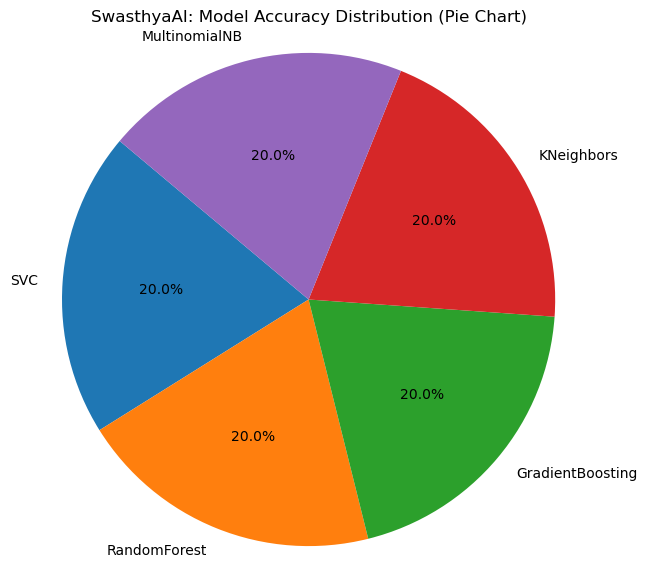

In [10]:
# 🎯 Pie Chart - Model Accuracy Distribution
plt.figure(figsize=(7, 7))
plt.pie(accuracies.values(), labels=accuracies.keys(), autopct='%1.1f%%', startangle=140)
plt.title("SwasthyaAI: Model Accuracy Distribution (Pie Chart)")
plt.axis('equal')
plt.show()


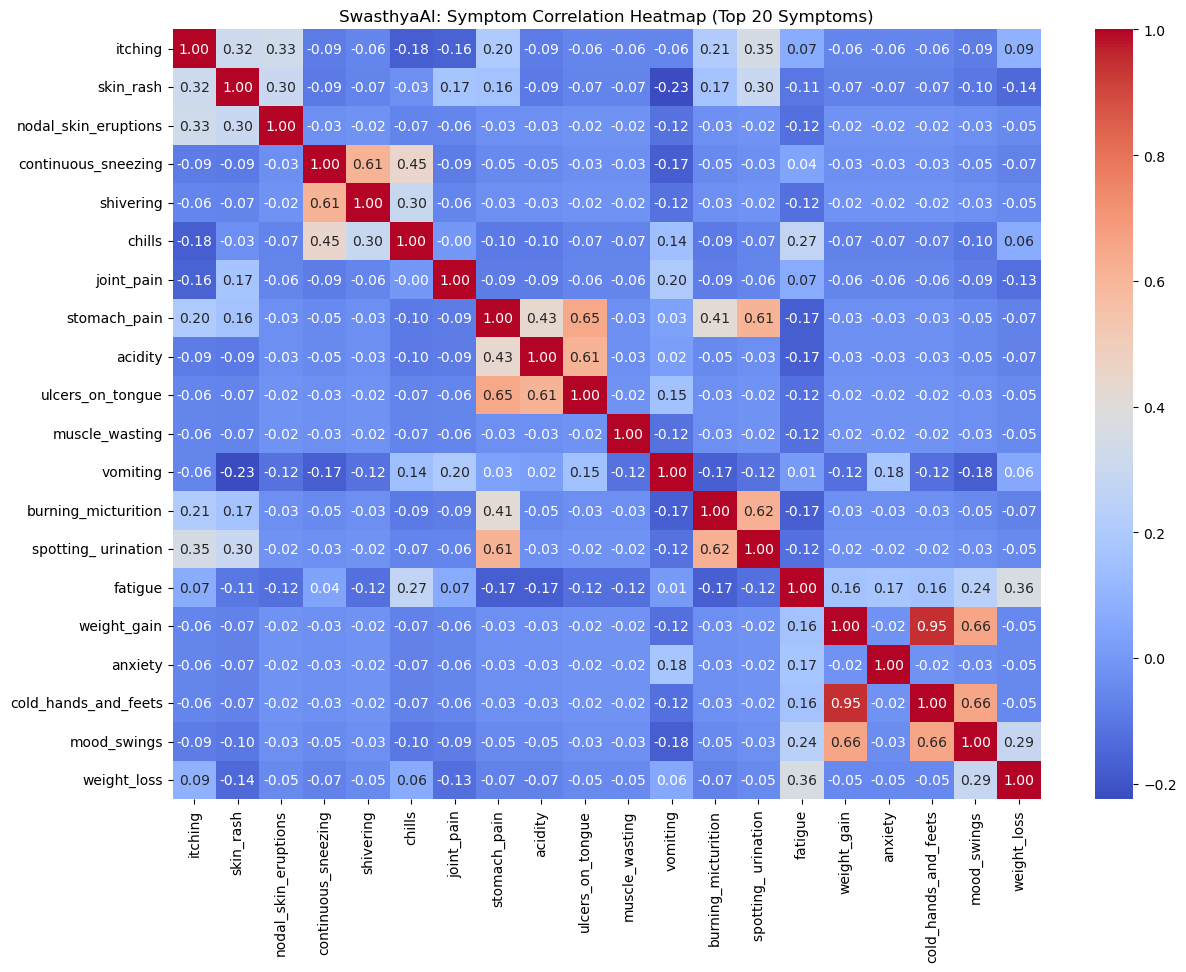

In [12]:
import seaborn as sns

# 📊 Correlation Heatmap - only first 20 features to avoid clutter
plt.figure(figsize=(14, 10))
subset = X.iloc[:, :20]  # You can change 20 to any number of top features
correlation_matrix = subset.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("SwasthyaAI: Symptom Correlation Heatmap (Top 20 Symptoms)")
plt.show()



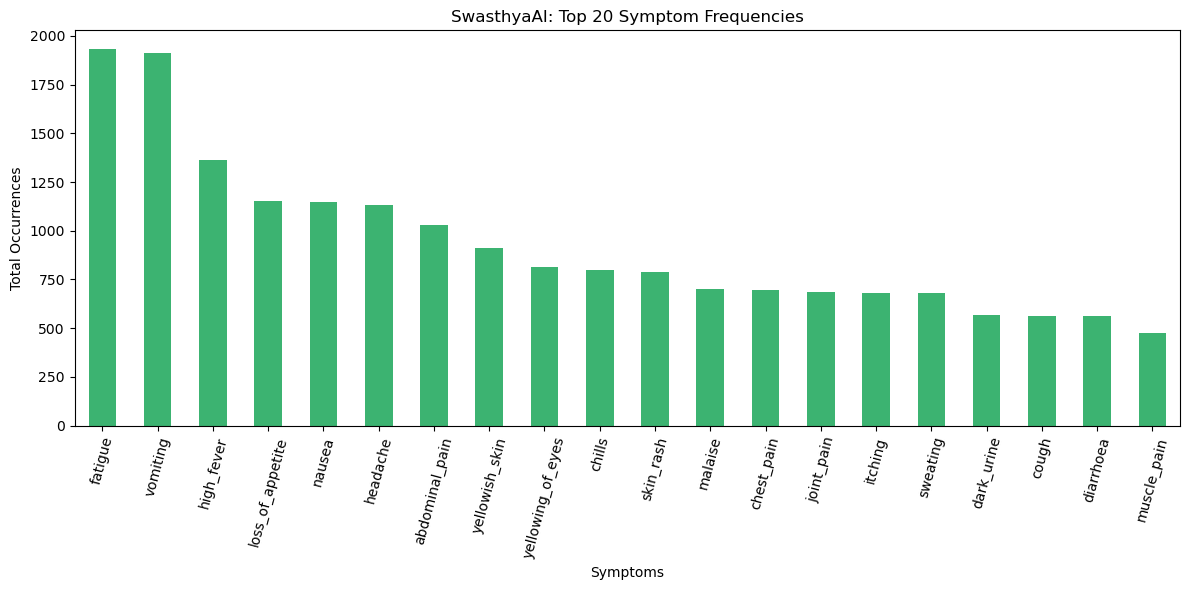

In [13]:
# 📊 Histogram - Symptom occurrence across all records
symptom_sums = X.sum().sort_values(ascending=False)[:20]  # Top 20 symptoms by occurrence

plt.figure(figsize=(12, 6))
symptom_sums.plot(kind='bar', color='mediumseagreen')
plt.xlabel("Symptoms")
plt.ylabel("Total Occurrences")
plt.title("SwasthyaAI: Top 20 Symptom Frequencies")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [21]:
# Use best model (e.g., SVC)
best_model = SVC(kernel='linear')
best_model.fit(X_train, y_train)

# Save & Load for SwasthyaAI usage
import pickle
pickle.dump(best_model, open('swasthyaai_model.pkl', 'wb'))
model = pickle.load(open('swasthyaai_model.pkl', 'rb'))

# Load symptom mappings & recommendation data
symptoms_dict = {symptom: i for i, symptom in enumerate(X.columns)}
diseases_list = dict(zip(range(len(le.classes_)), le.classes_))

description = pd.read_csv("description.csv")
precautions = pd.read_csv("precautions_df.csv")
medications = pd.read_csv("medications.csv")
diets = pd.read_csv("diets.csv")
workout = pd.read_csv("workout_df.csv")

# Helper function
def helper(disease):
    desc = description[description['Disease'] == disease]['Description'].values
    pre = precautions[precautions['Disease'] == disease].values[:, 1:]
    med = medications[medications['Disease'] == disease]['Medication'].values
    diet = diets[diets['Disease'] == disease]['Diet'].values
    work = workout[workout['disease'] == disease]['workout'].values
    return desc, pre, med, diet, work

# Prediction Function
def get_predicted_value(user_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for s in user_symptoms:
        if s in symptoms_dict:
            input_vector[symptoms_dict[s]] = 1
    return diseases_list[model.predict([input_vector])[0]]

# UI with checkboxes
checkboxes = [widgets.Checkbox(value=False, description=symptom) for symptom in symptoms_dict]
symptom_box = widgets.VBox(checkboxes, layout=widgets.Layout(overflow='scroll', height='400px'))

predict_btn = widgets.Button(description="🔍 Predict with SwasthyaAI", button_style='info')
output = widgets.Output()

def on_predict_click(b):
    selected = [cb.description for cb in checkboxes if cb.value]
    output.clear_output()
    if not selected:
        with output:
            print("⚠️ Please select at least one symptom.")
        return
    
    disease = get_predicted_value(selected)
    desc, pre, med, diet, work = helper(disease)

    with output:
        print("🩺 Predicted Disease:", disease)
        print("\n📋 Description:\n", desc[0] if len(desc) else "Not Available")
        
        print("\n🛡️ Precautions:")
        for i, p in enumerate(pre[0], 1):
            print(f"{i}. {p}")
        
        print("\n💊 Medications:")
        for i, m in enumerate(med, 1):
            print(f"{i}. {m}")
        
        print("\n🏋️ Workout Suggestions:")
        for i, w in enumerate(work, 1):
            print(f"{i}. {w}")
        
        print("\n🥗 Diet Suggestions:")
        for i, d in enumerate(diet, 1):
            print(f"{i}. {d}")

predict_btn.on_click(on_predict_click)

# Display SwasthyaAI Panel
display(widgets.HTML("<h2>🧠 SwasthyaAI Symptom Checker</h2>"))
display(symptom_box)
display(predict_btn)
display(output)


HTML(value='<h2>🧠 SwasthyaAI Symptom Checker</h2>')

Button(button_style='info', description='🔍 Predict with SwasthyaAI', style=ButtonStyle())

Output()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Evaluate each model and store metrics
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    performance_metrics['Model'].append(name)
    performance_metrics['Accuracy'].append(acc)
    performance_metrics['Precision'].append(prec)
    performance_metrics['Recall'].append(rec)
    performance_metrics['F1 Score'].append(f1)
import pandas as pd

# Step 2: Convert to DataFrame and format
metrics_df = pd.DataFrame(performance_metrics)
metrics_df.set_index('Model', inplace=True)

# Round values for clarity
metrics_df = metrics_df.round(4)

# Display the table
display(metrics_df)


,Accuracy,Precision,Recall,F1 Score
Model,,,,
SVC,1.0,1.0,1.0,1.0
RandomForest,1.0,1.0,1.0,1.0
GradientBoosting,1.0,1.0,1.0,1.0
KNeighbors,1.0,1.0,1.0,1.0
MultinomialNB,1.0,1.0,1.0,1.0
